# Yellowbrick Feature Analysis Visualizers

This notebook serves as a quick reference to the Yellowbrick functionality with regards to feature analysis for machine learning.

Source: https://www.scikit-yb.org/en/latest/api/features/index.html

# RadViz#

[]() | []()
---------- | -------------
Visualizer | ```RadialVisualizer```
Quick Method | ```radviz()```
Models | Classification, Regression
Workflow | Feature Engineering

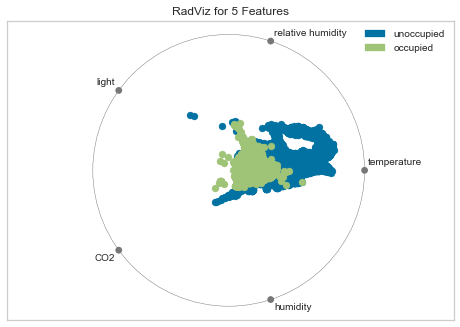

In [8]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

from yellowbrick.datasets import load_occupancy
from yellowbrick.features import RadViz
# or: from yellowbrick.features.radviz import RadialVisualizer, they are aliases

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

## RadViz Quick Method ##

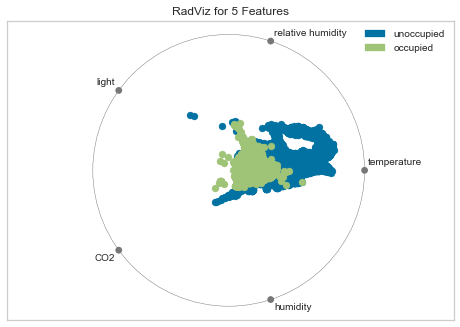

RadialVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001A032DAEB48>,
                 classes=['unoccupied', 'occupied'])

In [3]:
from yellowbrick.features.radviz import radviz
from yellowbrick.datasets import load_occupancy

#Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
radviz(X, y, classes=classes)

# Rank Features #

[]() | []()
---------- | -------------
Visualizers | ```Rank1D```, ```Rank2D```
Quick Method | ```rank1d()```, ```rank2d```
Models | General Linear Models
Workflow | Feature Engineering and Model Selection

### Rank 1D ###

C:\Users\aronf\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


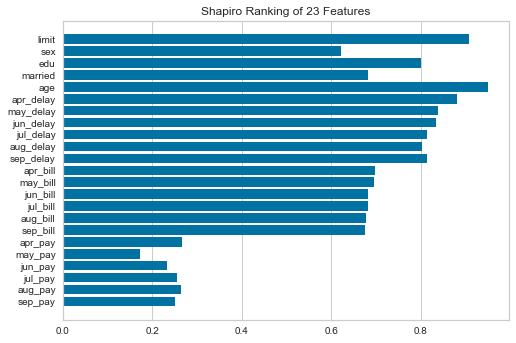

In [4]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank1D

# Load the credit dataset
X, y = load_credit()

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

### Rank 2D ###

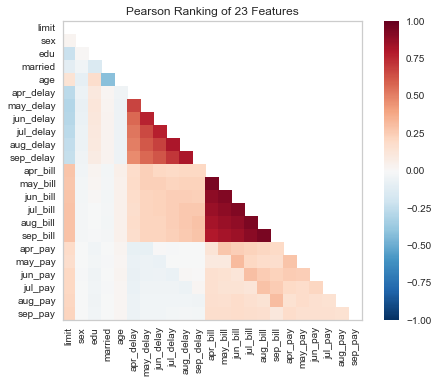

In [5]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

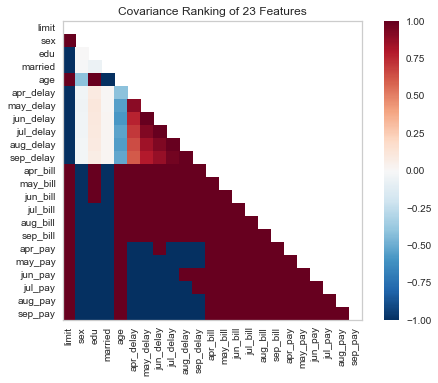

In [6]:
# Using covariance instead of Pearson

visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

### Quick Methods ###

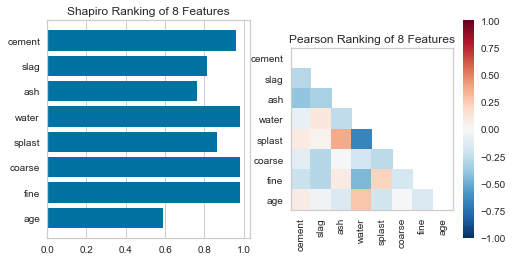

In [9]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d

# Load the concrete dataset
X, _ = load_concrete()

_, axes = plt.subplots(ncols=2, figsize=(8,4))

rank1d(X, ax=axes[0], show=False)
rank2d(X, ax=axes[1], show=False)
plt.show()

## Parallel Coordinates ##

[]() | []()
---------- | -------------
Visualizer | ```ParallelCoordinates```
Quick Method | ```parallel_coordinates()```
Models | Classification
Workflow | Feature Analysis

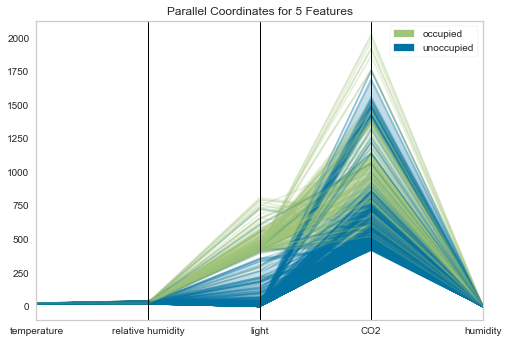

In [10]:
from yellowbrick.features import ParallelCoordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.show()

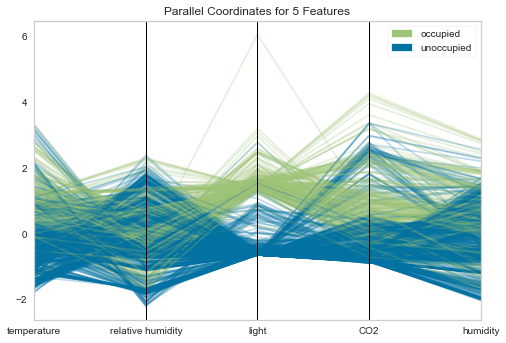

In [11]:
# The above has issues with scaling, can set the normalize parameter when creating the visualizer. 
# Do not have to scale data before passing into object.

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.05, shuffle=True,
)

# Fit the visualizer and display it
visualizer.fit_transform(X, y)
visualizer.show()

### Fast Parallel Coordinates ###

Drawing parallel coordinates can be slow as each instance is its own line. There are two suggested methods to speed up the process:
1. ```sample``` and ```shuffle``` the data
2. Use the ```fast``` parameter

These will drastically increase speed but some emphasis may be lost, as demonstrated below

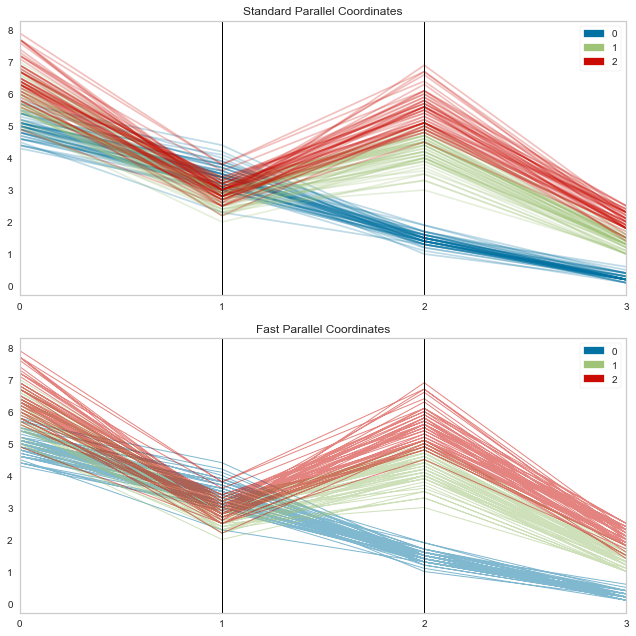

In [12]:
from sklearn.datasets import load_iris
from yellowbrick.features import ParallelCoordinates

data = load_iris()

_, axes = plt.subplots(nrows=2, figsize=(9,9))

for idx, fast in enumerate((False, True)):
    title = "Fast Parallel Coordinates" if fast else "Standard Parallel Coordinates"
    oz = ParallelCoordinates(ax=axes[idx], fast=fast, title=title)
    oz.fit_transform(data.data, data.target)
    oz.finalize()

plt.tight_layout()

### Quick Method ###

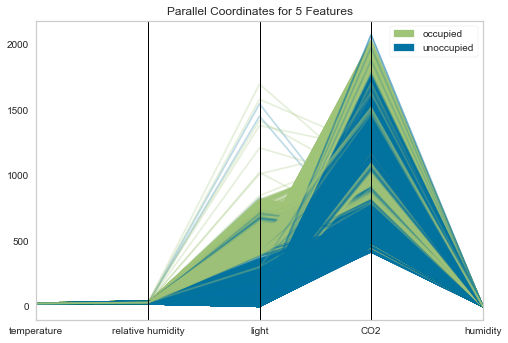

In [13]:
from yellowbrick.features.pcoords import parallel_coordinates
from yellowbrick.datasets import load_occupancy

# Load the classification data set
X, y = load_occupancy()

# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
visualizer = parallel_coordinates(X, y, classes=classes, features=features)

## PCA Projection ##

[]() | []()
---------- | -------------
Visualizer | ```PCA```
Quick Method | ```pca_decomposition()```
Models | Classification, Regression
Workflow | Feature Engineering/Selection

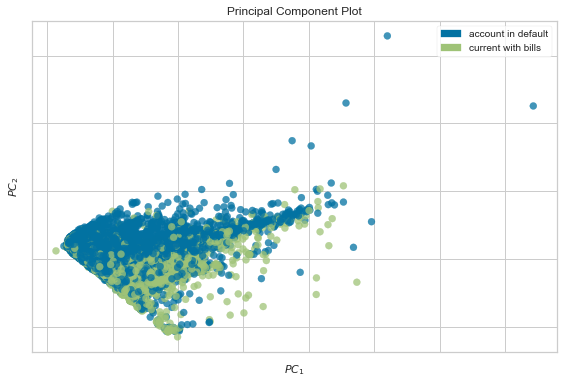

In [14]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show()

#### 3D Projection

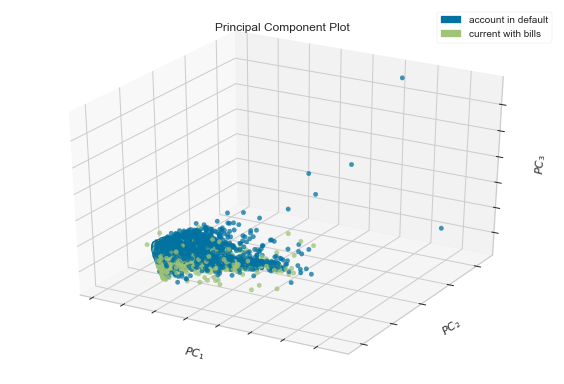

In [15]:
visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X, y)
visualizer.show()

### Biplot

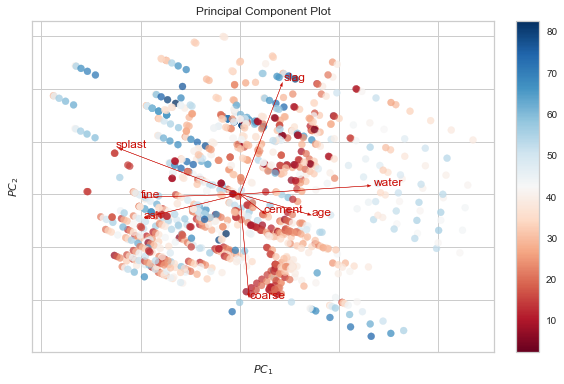

In [16]:
from yellowbrick.features import PCA

# Load the concrete dataset
X, y = load_concrete()

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

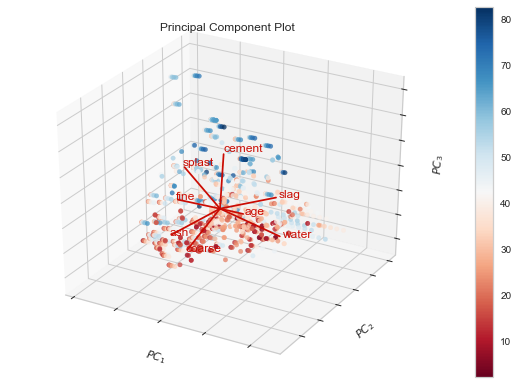

In [17]:
visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X, y)
visualizer.show()

### Quick Method

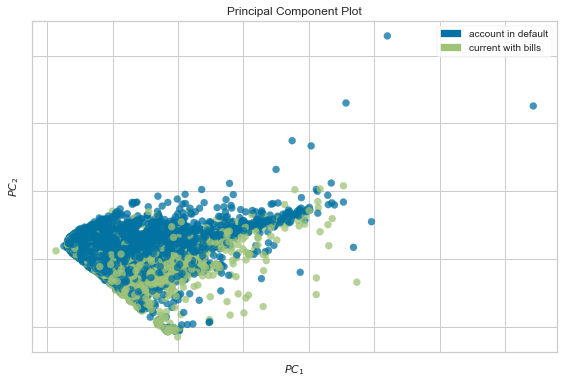

PCA(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001A035F253C8>,
    classes=['account in default', 'current with bills'])

In [18]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import pca_decomposition

# Specify the features of interest and the target
X, y = load_credit()
classes = ['account in default', 'current with bills']

# Create, fit, and show the visualizer
pca_decomposition(
    X, y, scale=True, classes=classes
)

## Manifold Visualization

[]() | []()
---------- | -------------
Visualizer | ```Manifold```
Quick Method | ```manifold_embedding()```
Models | Classification, Regression
Workflow | Feature Engineering

### Discrete Target

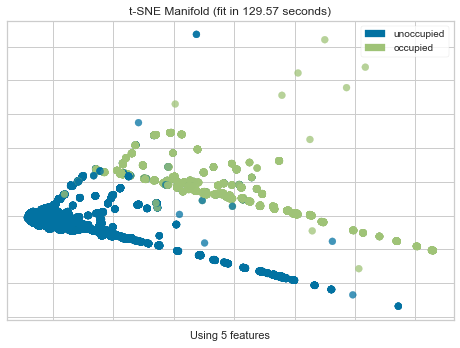

In [19]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()
classes = ["unoccupied", "occupied"]

# Instantiate the visualizer
viz = Manifold(manifold="tsne", classes=classes)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

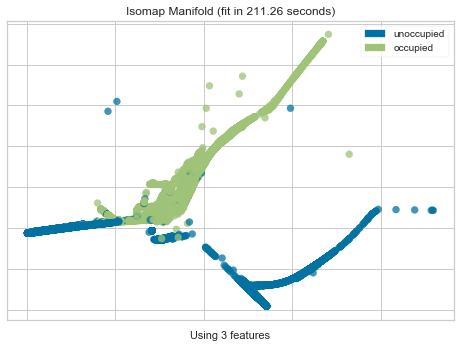

In [20]:
# Choosing features that have strong correlation to target set can yield more interesting results

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

from yellowbrick.features import Manifold
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()
classes = ["unoccupied", "occupied"]

# Create a pipeline
model = Pipeline([
    ("selectk", SelectKBest(k=3, score_func=f_classif)),
    ("viz", Manifold(manifold="isomap", n_neighbors=10, classes=classes)),
])

model.fit_transform(X, y)          # Fit the data to the model
model.named_steps['viz'].show()   # Finalize and render the figure

### Continuous Target

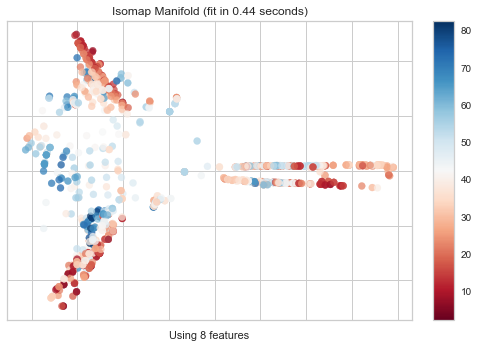

In [21]:
from yellowbrick.features import Manifold
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate the visualizer
viz = Manifold(manifold="isomap", n_neighbors=10)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

### Quick Method

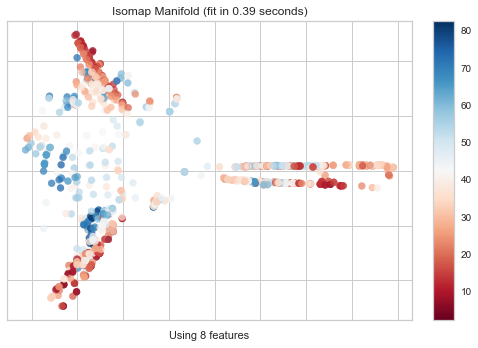

Manifold(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001A04EAC6DC8>,
         colormap='RdBu', manifold=Isomap(n_neighbors=10), n_neighbors=10)

In [23]:
from yellowbrick.features.manifold import manifold_embedding
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Instantiate the visualizer
manifold_embedding(X, y, manifold="isomap", n_neighbors=10)

## Joint Plot Visualization

[]() | []()
---------- | -------------
Visualizer | ```JointPlotVisualizer```
Quick Method | ```joint_plot()```
Models | Classification/Regression
Workflow | Feature Engineering/Selection

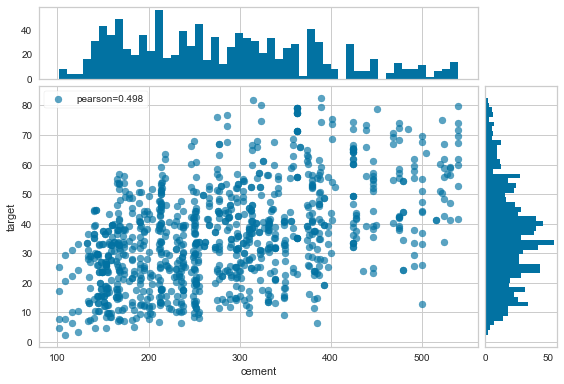

In [25]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="cement")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

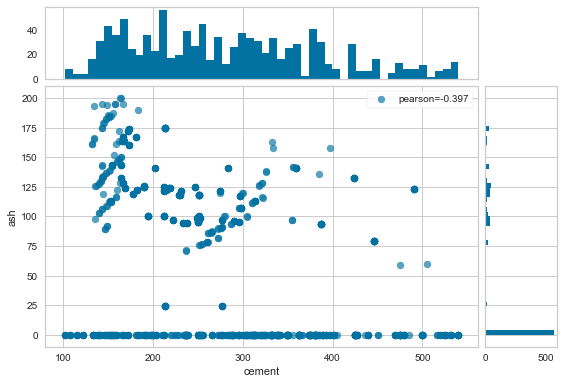

In [26]:
# Comparing two features

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns=["cement", "ash"])

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

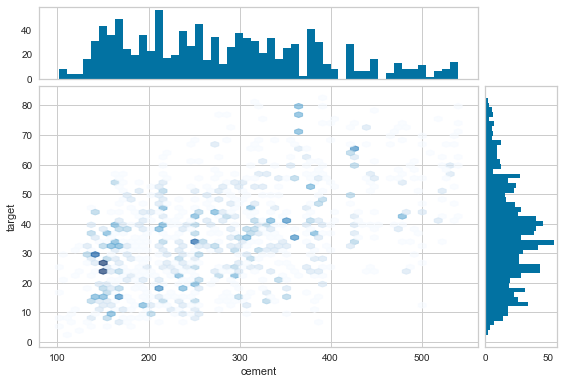

In [27]:
# With hexbins

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="cement", kind="hexbin")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

### Quick Method

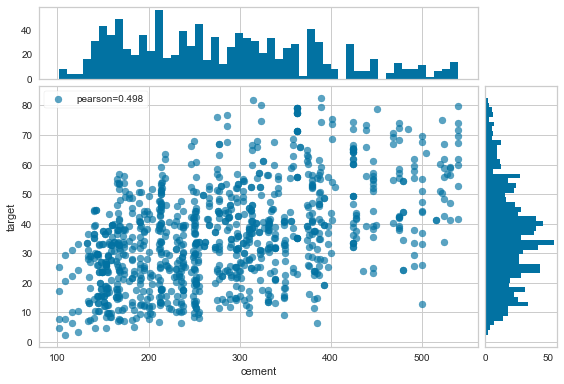

In [28]:
from yellowbrick.features import joint_plot

# Load the dataset
X, y = load_concrete()

# Instantiate the visualizer
visualizer = joint_plot(X, y, columns="cement")